<a href="https://colab.research.google.com/github/iremaytekin/hu-bby2021proje4/blob/main/F%C4%B0NAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
1875/1875 [==============================] - 71s 18ms/step - loss: 0.2026 - accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0798 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0572 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0441 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0272 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0214 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/

FileNotFoundError: ignored

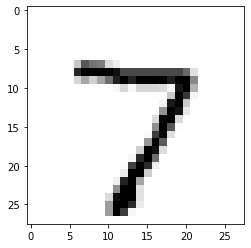

In [14]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 4956
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

x_train.shape

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)

image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


from PIL import Image
import numpy as np

png = Image.open ("/Content/drive/MyDrive/elyazısı/IMG_20220103_4.png").convert ("L")
png = np.resize(png, (28, 28, 1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28))

guessOrder = model.predict(pngBinary.reshape(1, 28, 28, 1))
guessNumber = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(guessOrder)
print(guessNumber)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')